## 데이터 클리닝: 완결성

* 결측값을 채워야 한다.

In [1]:
import pandas as pd

In [97]:
df = pd.read_csv('data/lec14_DataCleaning/attendance.csv', index_col=0)
df

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,NaN,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,NaN,4537,1150
2013,11373,7656,NaN,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


In [10]:
# 데이터가 크면 결측값을 찾기도 힘들다. isnull() 함수로 결측값을 찾을 수 있다.
df.isnull()
df.isnull().sum() # sum 함수로 각 컬럼에 몇개의 결측값들이 있는지 확인할 수 있다.

야구      0
축구      0
배구      3
남자농구    0
여자농구    0
dtype: int64

### 결측값을 채우는 방법들
1. 다시 조사해서 채운다.
2. 그대로 둔다 (결측값이 존재하는데 의미가 있을 때가 있다.)
3. 결측값을 가진 레코드들을 아예 지워버린다. df.dropna()
4. 해당된 컬럼을 포기한다. df.dropna(axis='columns')
5. 결측값을 특정값으로 대체해준다.

In [11]:
df.dropna() # inplace = True 를 써줘야 본래 데이터 프레임을 고칠 수 있다.

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2011,13055,10709,1774.0,3955,1445
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425
2017,11668,6502,2425.0,3188,1097


In [20]:
df.dropna(axis='columns')

,야구,축구,남자농구,여자농구
연도,,,,
2008,10881,11642,4208,1329
2009,11562,10983,4152,1206
2010,11402,12873,3870,705
2011,13055,10709,3955,1445
2012,13747,7157,4537,1150
2013,11373,7656,4092,1237
2014,11429,8115,4458,1417
2015,10357,7720,3953,1480
2016,11583,7854,3543,1425


In [23]:
df.fillna(df.mean()) # 자동으로 해당되는 컬럼의 평균값을 넣어준다
df.fillna(df.median()) # 자동으로 해당되는 컬럼의 중앙값을 넣어준다

,야구,축구,배구,남자농구,여자농구
연도,,,,,
2008,10881,11642,1253.0,4208,1329
2009,11562,10983,1471.0,4152,1206
2010,11402,12873,1967.0,3870,705
2011,13055,10709,1774.0,3955,1445
2012,13747,7157,1967.0,4537,1150
2013,11373,7656,1967.0,4092,1237
2014,11429,8115,1967.0,4458,1417
2015,10357,7720,2311.0,3953,1480
2016,11583,7854,2336.0,3543,1425


---
## 데이터 클리닝: 유일성
* 중복된 데이터의 제거
* row가 중복되는 경우와 column이 중복되는 경우 2가지가 있다.

In [25]:
import pandas as pd

In [28]:
df = pd.read_csv('data/lec14_DataCleaning/dust.csv', index_col=0)
df.head()

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18


In [30]:
#row 가 중복될때
df.index.value_counts()
# 7월 31일이 두번나온다.

07월 31일    2
07월 22일    1
07월 24일    1
07월 25일    1
07월 13일    1
08월 06일    1
08월 11일    1
07월 15일    1
08월 03일    1
08월 04일    1
07월 20일    1
08월 08일    1
07월 29일    1
08월 10일    1
07월 16일    1
07월 30일    1
08월 02일    1
07월 26일    1
07월 21일    1
07월 14일    1
07월 28일    1
07월 17일    1
07월 23일    1
07월 19일    1
07월 18일    1
08월 05일    1
08월 07일    1
07월 27일    1
08월 09일    1
08월 01일    1
Name: 날짜, dtype: int64

In [32]:
df.loc['07월 31일']

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19
07월 31일,18,26,17,23,23,17,23,21,19,20,21,21,22,19,22,25,28,19


In [36]:
# 중복된 row를 삭제할 땐 df.drop_duplicates()를 사용한다. 
df.drop_duplicates(inplace=True) # inplace=True를 통해 df에 직접 반영할 수 있다.
df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주,강원.1
날짜,,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21,16
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23,16
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27,29
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26,18
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24,22
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22,25
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27,39
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26,33


In [49]:
# 중복된 컬럼을 삭제
#df.T 를 통해 row와 column을 바꿀 수있다.
df = df.T.drop_duplicates()# df.T.drop_duplicates(inplace = True).T 를 하면 뒤에 붙는 T때문에 inplace가 오류가 난다.
# 강원과 강원.1은 이름이 달랐지만, 같은 내용이여서 drop_duplicates로 삭제되었다.
df

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,세종,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,
08월 11일,7,17,15,10,29,12,12,9,16,14,16,25,21,11,14,24,21
08월 10일,15,25,15,20,28,25,17,20,16,25,29,29,25,27,14,29,23
08월 09일,24,26,26,27,27,27,22,27,25,32,24,24,27,26,25,38,25
08월 08일,26,25,28,26,29,31,20,26,29,33,26,29,31,31,28,32,27
08월 07일,20,26,22,25,33,24,18,23,18,23,29,33,29,27,19,28,26
08월 06일,31,39,29,35,27,31,31,30,22,33,28,27,30,34,29,37,24
08월 05일,27,36,25,31,27,24,30,27,25,31,25,26,25,25,28,31,22
08월 04일,27,36,26,31,27,27,32,31,39,36,30,27,27,29,29,36,27
08월 03일,44,32,23,47,29,28,29,44,33,31,34,27,28,32,28,31,26


---
## 데이터 클리닝: 정확성
* 이상점(OutLier)의 처리 : 이상점을 판단하는 절대적인 기준은 없다. 실제로도 다양한 방법으로 판단하고 있다. 그 중 하나가 boxplot의 이상점 계산법이다.
* 이상점이 오류값이라면 : 삭제하거나 수정해준다.
* 이상점이 실측값이라면 : 분석에 방해가 된다면 제거하고, 의미있는 정보라면 그냥 둔다. 
* 이러한 데이터 처리가 실 업무에 도움이 될지, 피해가 될지 판단하여 상황에 맞게 이상점을 처리해주어야 한다.

In [50]:
%matplotlib inline
import pandas as pd

In [53]:
df = pd.read_csv('data/lec14_DataCleaning/beer.csv', index_col=0)
df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0


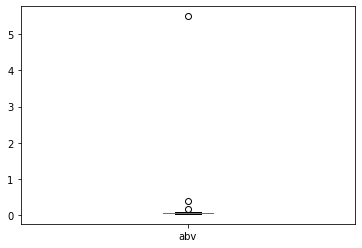

In [55]:
df.plot(kind='box', y='abv')
# 이상점이 너무 동떨어져있다. 데이터를 확인해본다.

In [56]:
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [57]:
df['abv'].quantile(0.25) # 해당하는 %지점의 값을 받아올 수 있다.

0.05

In [65]:
#box plot 기본 이상점 공식
q1 = df['abv'].quantile(0.25)
q3 = df['abv'].quantile(0.75)
iqr = q3-q1
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)

In [61]:
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


*맥주 데이터를 모아놨지만 첫항엔 소주가 들어간다  
*두번째 데이터도 맥주가 아닌 보드카가 들어가있다.  
*세번째 데이터는 0.055가 5.5로 잘못 표기되있음을 추측할 수 있다.

In [63]:
df.loc[2250, 'abv'] = 0.055
df.loc[2250]

abv                             0.055
ibu                                40
id                                145
name              Silverback Pale Ale
style         American Pale Ale (APA)
brewery_id                        424
ounces                             12
Name: 2250, dtype: object

In [67]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [68]:
df.drop(df[condition].index, inplace = True) # drop 함수로 삭제해준다

In [69]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces


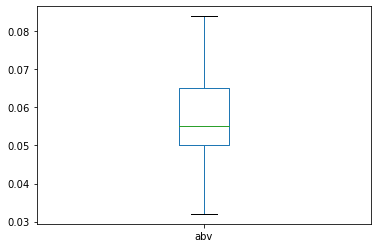

In [70]:
df.plot(kind = 'box', y='abv')

---
### 정확성 클리닝 2

In [71]:
%matplotlib inline
import pandas as pd

In [91]:
df = pd.read_csv('data/lec14_DataCleaning/exam_outlier.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


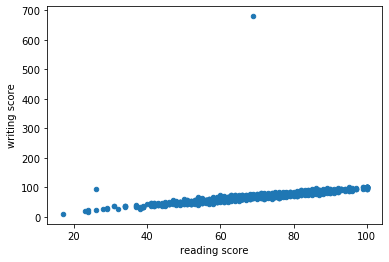

In [79]:
df.plot(x='reading score', y='writing score', kind = 'scatter')
# outlier가 존재한다
# 100점 만점에 700점이 넘는다. (잘못된 점수)

In [80]:
df.corr()
# 이상점에 큰 영향을 받아 상관도가 비교적 낮게 나온다

,math score,reading score,writing score
math score,1.000000,0.810412,0.513623
reading score,0.810412,1.000000,0.582378
writing score,0.513623,0.582378,1.000000


In [92]:
condition = df['writing score'] > 100
df[condition]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,male,group E,associate's degree,free/reduced,completed,77,69,680


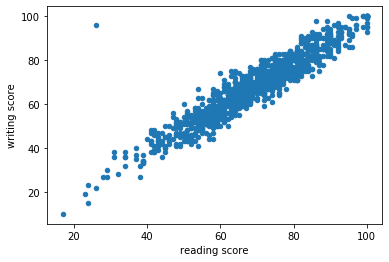

In [93]:
df.drop(51, inplace=True)
df.plot(kind='scatter', x='reading score', y='writing score')

In [85]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.810627,0.802853
reading score,0.810627,1.000000,0.943248
writing score,0.802853,0.943248,1.000000


In [94]:
# 또 하나의 이상점을 확인해본다.
condition = (df['writing score'] > 90) & (df['reading score'] < 40)
df[condition]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
373,female,group D,some college,standard,completed,82,26,96


위 학생은 다른점수에 비해 읽기점수가 비정상적으로 낮다.
분석에 방해가 될 수 있으므로 삭제해준다.  

이러한 결측값을 삭제하거나 놔두는것은 데이터 분석가의 판단에 맡겨야 한다.

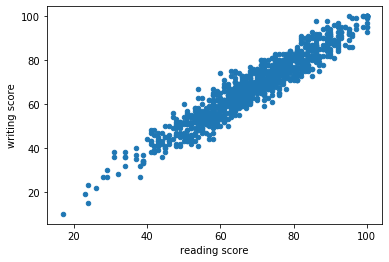

In [95]:
df.drop(373, inplace=True)
df.plot(kind='scatter', x='reading score', y='writing score')

In [96]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817735,0.802722
reading score,0.817735,1.000000,0.954440
writing score,0.802722,0.954440,1.000000
